# Load the necessary libraries

In [1]:
import ipywidgets as widgets
import watermark
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from collections import Counter



# Load the data and display a sample of the dataset

In [2]:
data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(data)

display(df.head(n=10))

X = data.drop(columns=['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Latest_Launch', 'Power_perf_factor'])
y = data.drop(columns=['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'])


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
3,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639
4,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,8/9/2011,84.565105
5,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
6,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170,107.3,68.4,176.0,3.179,16.6,26,6/28/2011,71.191207
7,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
8,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,4/4/2011,83.998724
9,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,11/2/2011,71.181451


# Prediction Utility Area

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
r2_score = regressor.score(X_test, y_test)
r2_score = (r2_score * 100)
print("Accuracy score: " + str(r2_score) + "%.")


Accuracy score: -10.385797554347164%.


In [6]:
y_predict = regressor.predict(X)

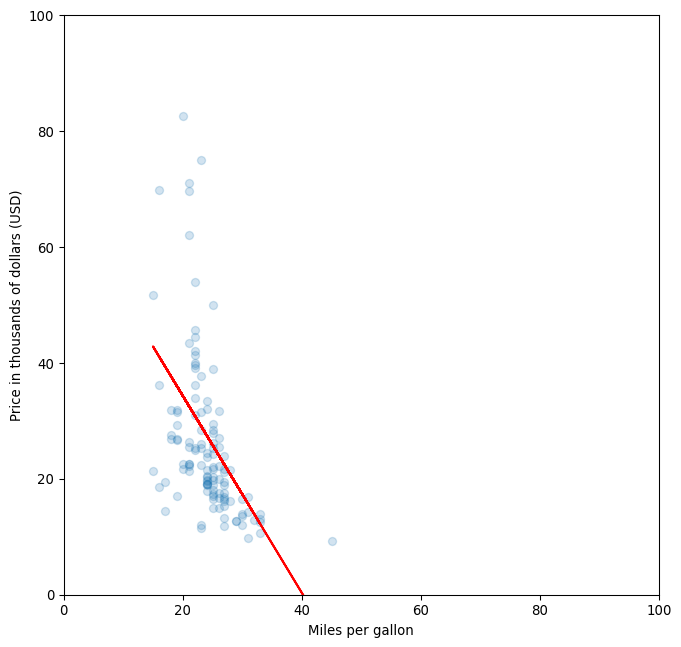

In [7]:
plt.figure(figsize=(8, 8), dpi=96)
plt.scatter(X, y, alpha=0.2)
plt.plot(X, y_predict, color='red')
plt.ylim([0, 100])
plt.xlim([0, 100])
plt.xlabel('Miles per gallon')
plt.ylabel('Price in thousands of dollars (USD)')
plt.show()


## Finding the coefficient of the linear equation.

In [8]:
# Finding the coefficient of the linear equation above.
# print(linreg.coef_)
print(regressor.coef_)
coeff = regressor.coef_


[[-1.69926008]]


 ## Finding the Y-Intercept.

In [9]:
# Finding the y-intercept of the linera equation above, i.e. "What is the price when x = 0?". 
# print(linreg.intercept_)
print(regressor.intercept_)
y_intercept = regressor.intercept_


[68.29125917]


## Predictive Tool: Price Prediction based on MPG with interactive slider widget

In [11]:
label = widgets.Label(value="Use the slider to set desired miles per gallon.")

def on_button_clicked(b):
    cust_input = slider.value
    with output:
        cust_price = ((coeff) * cust_input) + y_intercept
        cust_price = (cust_price * 1000)
        cust_price_flt = float(cust_price)
        cust_price_str = str(round(cust_price_flt, 2))
        print("For the given " + str(cust_input) + " miles per gallon, the predicted price is $" + str(cust_price_str) + ".")
        predict_button

predict_button = widgets.Button(description="Predict price!")
predict_button.on_click(on_button_clicked)

output = widgets.Output()

slider = widgets.IntSlider(min=15, max=45, step=1, value=15, description="")
cust_input = slider.value

display(label)
display(slider)
display(predict_button, output)


Label(value='Use the slider to set desired miles per gallon.')

IntSlider(value=15, max=45, min=15)

Button(description='Predict price!', style=ButtonStyle())

Output()

# Chart area

Text(0, 0.5, 'Amount of Sales in Thousands')

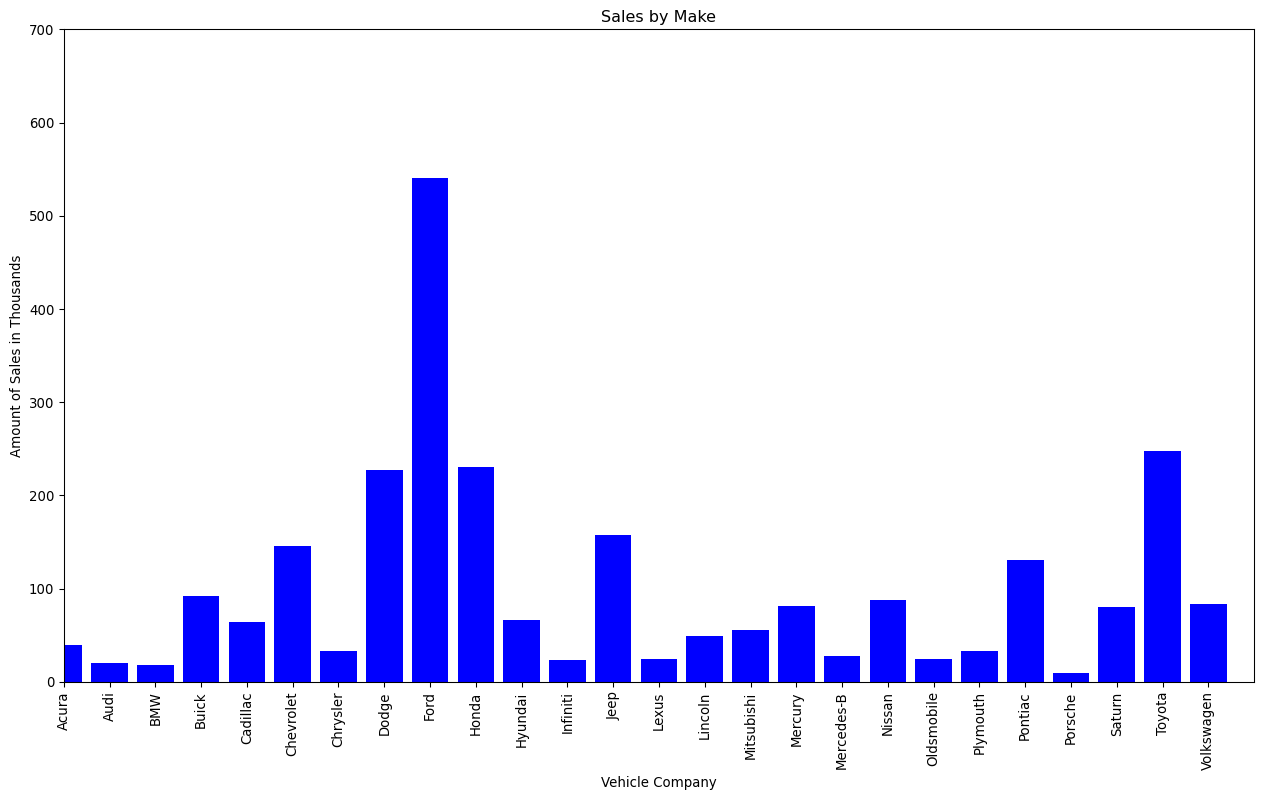

In [12]:
bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 2])

# Plot the data using bar() method
plt.figure(figsize=(16, 9), dpi=96)
plt.bar(X, Y, color='b')

plt.ylim([0, 700])
plt.xlim([0, 26])
plt.title("Sales by Make")
plt.xlabel("Vehicle Company")
plt.xticks(rotation=90)
plt.ylabel("Amount of Sales in Thousands")
 


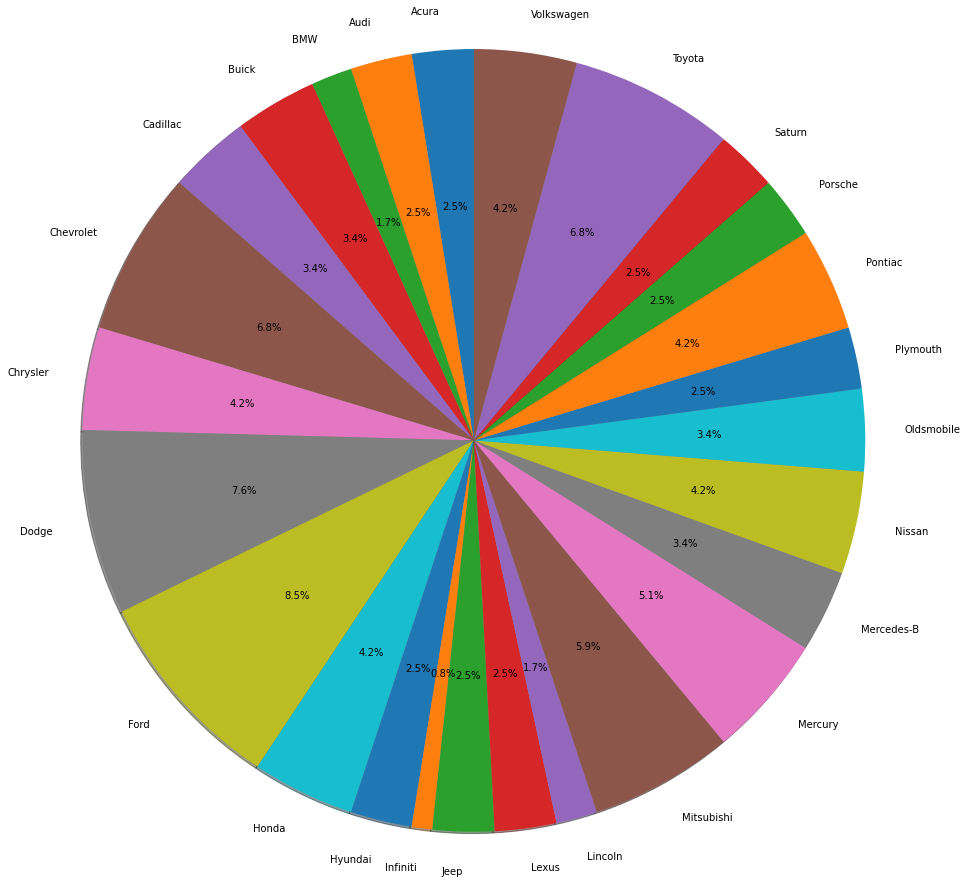

In [13]:
# Percent of dollar sales by car manufacturer

bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
labels = list(df.iloc[:, 0])
vehicle_make_counts = Counter(labels)

vehicle_makes = list(vehicle_make_counts.keys())
vehicle_dollar_sales = list(vehicle_make_counts.values())

sales_amounts = list(df.iloc[:, 2])

fig1, ax1 = plt.subplots()
ax1.pie(vehicle_dollar_sales, labels=vehicle_makes, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=4.5)
plt.show()


In [14]:
#############################

<AxesSubplot:title={'center':'Miles Per Gallon to Horse Power'}, xlabel='Miles Per Gallon', ylabel='Horse Power'>

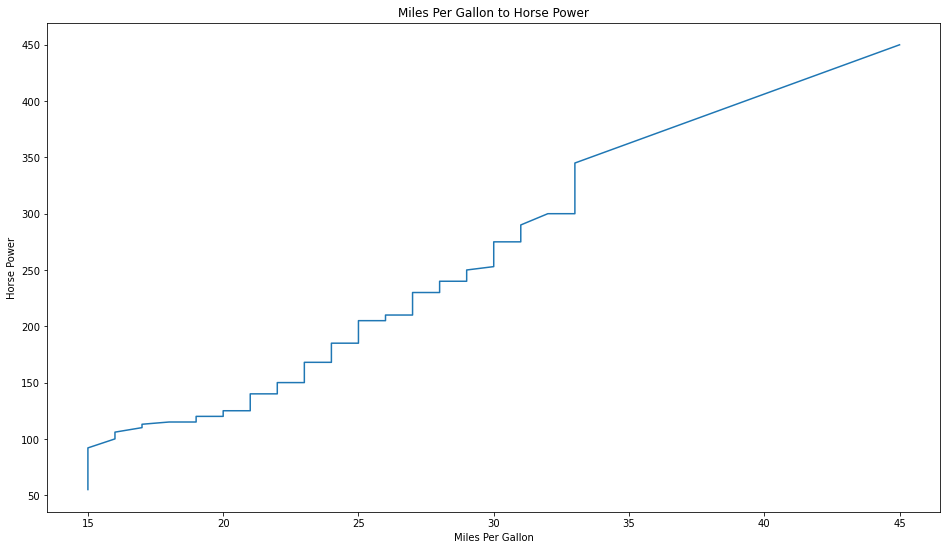

In [15]:
line_data = pd.read_csv('Car_sales.csv')
df.dropna(inplace = True)

X = list(df.iloc[:, 7])
X.sort()

Y = list(df.iloc[:, 13])
Y.sort()


df = pd.DataFrame(X, Y)
  
df.plot(figsize=(16, 9), xlabel="Miles Per Gallon", ylabel="Horse Power", title="Miles Per Gallon to Horse Power", legend=False)

Text(0, 0.5, 'Vehicle Model')

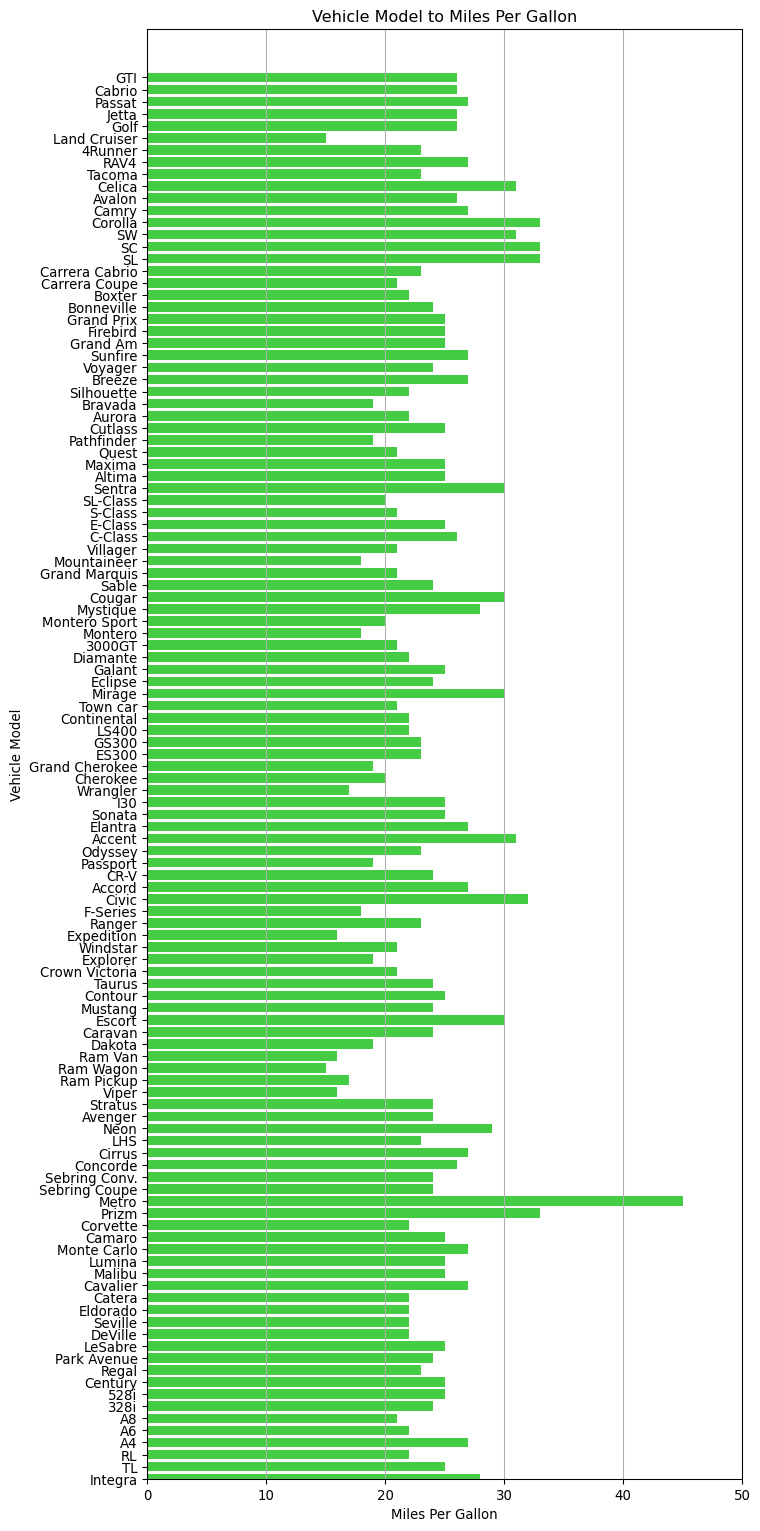

In [16]:
# MPG by model
bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 13])

# Plot the data using bar() method
plt.figure(figsize=(8, 20), dpi=96)
plt.barh(X, Y, color='#44cc44')

plt.grid(True)
plt.grid(axis='y')
plt.xlim([0, 50])
plt.ylim([0, 120])
plt.title("Vehicle Model to Miles Per Gallon")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Vehicle Model")

 

Text(0, 0.5, 'Vehicle Model')

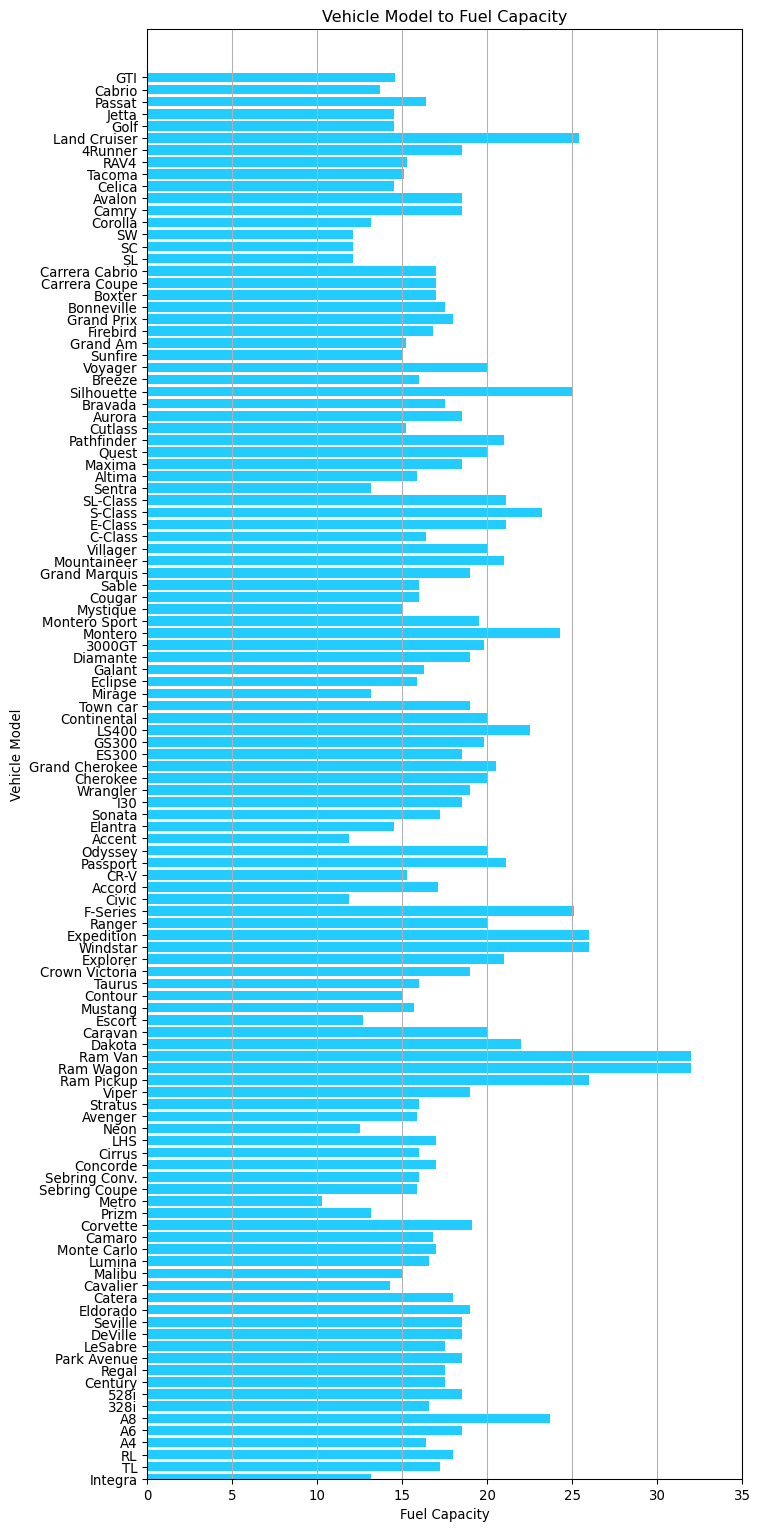

In [17]:
# Fuel capacity by model
bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 12])

# Plot the data using bar() method
plt.figure(figsize=(8, 20), dpi=96)
plt.barh(X, Y, color='#22ccff')

plt.grid(True)
plt.grid(axis='y')
plt.xlim([0, 35])
plt.ylim([0, 120])
plt.title("Vehicle Model to Fuel Capacity")
plt.xlabel("Fuel Capacity")
plt.ylabel("Vehicle Model")

Text(0, 0.5, 'Vehicle Model')

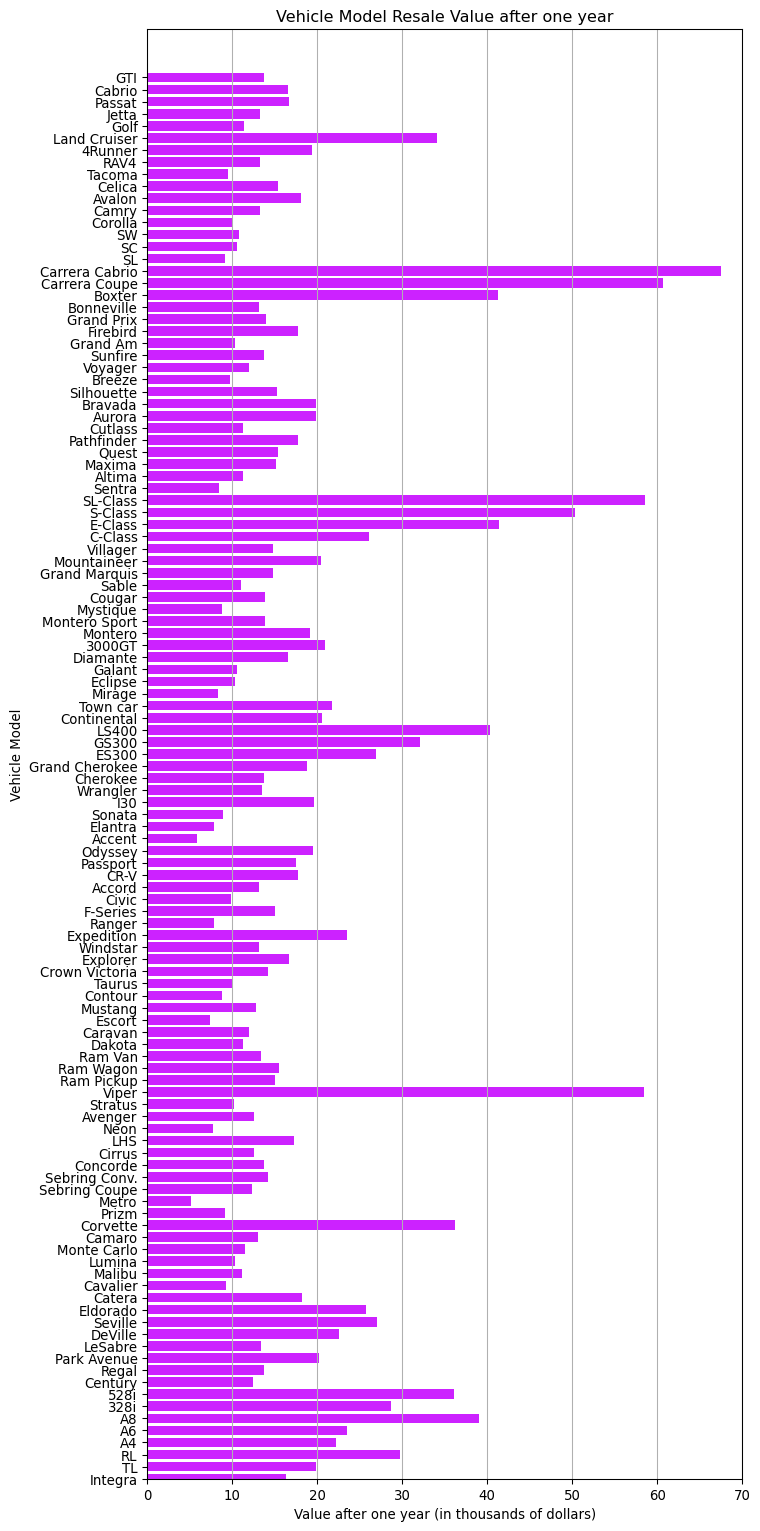

In [18]:
# Resale value after one year
bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 3])

# Plot the data using bar() method
plt.figure(figsize=(8, 20), dpi=96)
plt.barh(X, Y, color='#cc22ff')

plt.grid(True)
plt.grid(axis='y')
plt.xlim([0, 70])
plt.ylim([0, 120])
plt.title("Vehicle Model Resale Value after one year")
plt.xlabel("Value after one year (in thousands of dollars)")
plt.ylabel("Vehicle Model")

Text(0, 0.5, 'Vehicle Model')

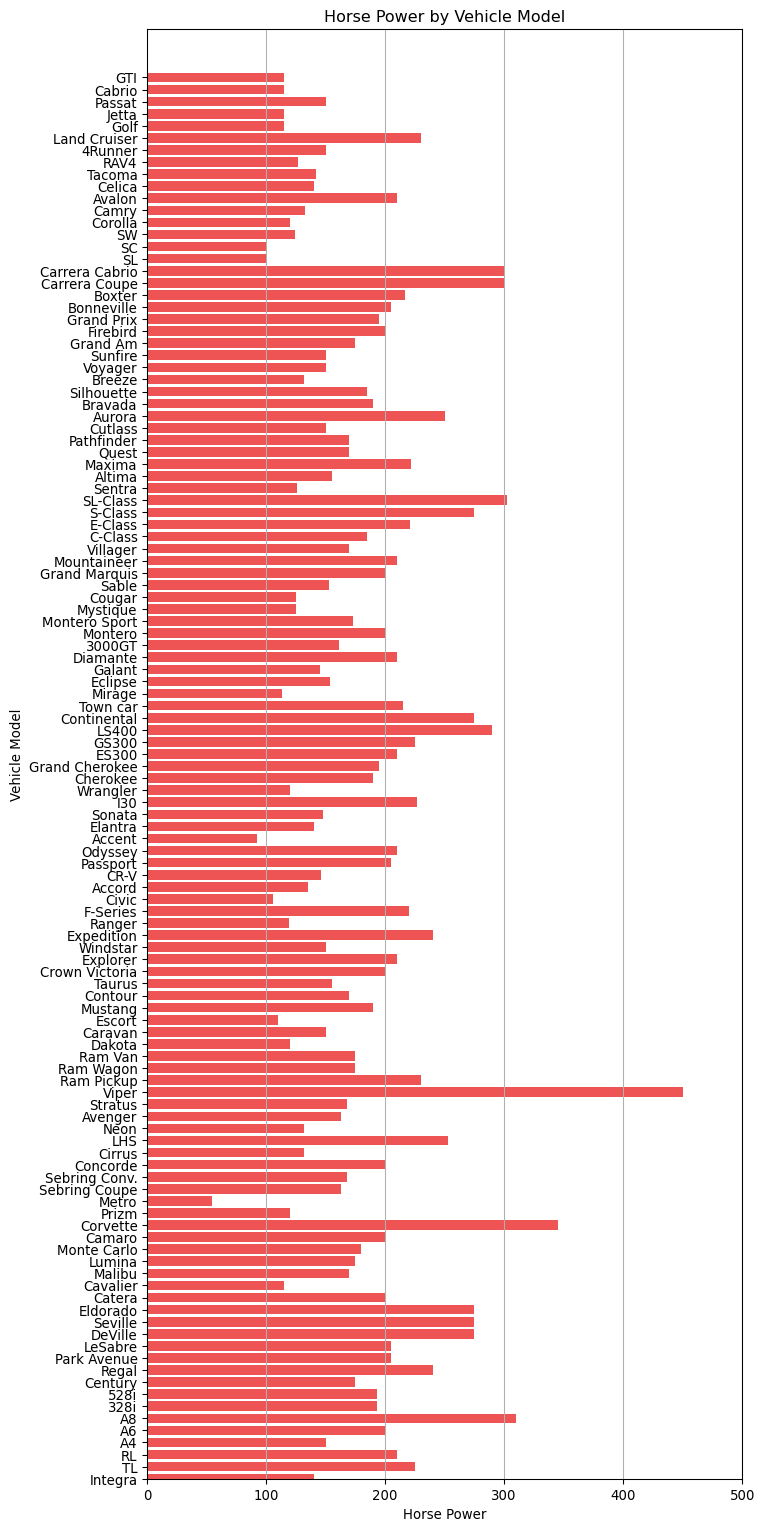

In [19]:
# Resale value after one year
bar_data = pd.read_csv('Car_sales.csv')
df = pd.DataFrame(bar_data)
df.dropna(inplace = True)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 7])

# Plot the data using bar() method
plt.figure(figsize=(8, 20), dpi=96)
plt.barh(X, Y, color='#ee5454')

plt.grid(True)
plt.grid(axis='y')
plt.xlim([0, 500])
plt.ylim([0, 120])
plt.title("Horse Power by Vehicle Model")
plt.xlabel("Horse Power")
plt.ylabel("Vehicle Model")

In [20]:
#############################

# Environment information #

In [21]:
#############################

In [22]:
%load_ext watermark

# Get environment and dependencies
%watermark -v -m -p pandas,numpy,sklearn,ipywidgets,IPython,matplotlib,watermark

# date
print(" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

pandas    : 1.3.4
numpy     : 1.20.3
sklearn   : 0.24.2
ipywidgets: 7.6.5
IPython   : 7.29.0
matplotlib: 3.4.3
watermark : 2.3.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 8.1
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

 
Last updated: Wed Apr 13 2022 12:08:36Eastern Daylight Time

